In [227]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from IPython.display import Image 
from catboost import Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [9]:
!ls

"ls" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [10]:
df_earnings_05 = pd.read_excel("data/extra_data/05.2022_earnings_extra.xlsx")



In [11]:
df_earnings_05

,TimeThirty,DAT,Торговая точка,Касса,orgtype,terminal,tzone,TotalSumm
0,2022-05-01 00:00:00.000,2022-05-01,Торговая точка 0601,7683,Общепит,B,Чистая зона ВВЛ-вылет,755 448
1,2022-05-04 13:30:00.000,2022-05-04,Торговая точка 2373,3114,Общепит,B,Общедоступная зона-вылет,46 800
2,2022-05-05 18:00:00.000,2022-05-05,Торговая точка 8998,9887,Торговля,B,Чистая зона ВВЛ-вылет,160 160
3,2022-05-25 22:00:00.000,2022-05-25,Торговая точка 8313,2251,Общепит,B,Чистая зона ВВЛ-вылет,248 960
4,2022-05-10 00:30:00.000,2022-05-10,Торговая точка 8998,9887,Торговля,B,Чистая зона ВВЛ-вылет,117 600
...,...,...,...,...,...,...,...,...
11835,2022-05-12 19:00:00.000,2022-05-12,Торговая точка 8313,2251,Общепит,B,Чистая зона ВВЛ-вылет,72 320
11836,2022-05-24 10:00:00.000,2022-05-24,Торговая точка 3726,5944,Общепит,B,Чистая зона ВВЛ-вылет,396 000
11837,2022-05-12 08:00:00.000,2022-05-12,Торговая точка 3726,5944,Общепит,B,Чистая зона ВВЛ-вылет,300 000
11838,2022-05-28 21:30:00.000,2022-05-28,Торговая точка 0601,7683,Общепит,B,Чистая зона ВВЛ-вылет,444 800


In [12]:
df_earnings_05['TimeThirty'] = pd.to_datetime(df_earnings_05['TimeThirty'])

In [13]:
df_earnings_05['Time'] = pd.to_datetime(df_earnings_05['TimeThirty']).dt.time

In [14]:
df_earnings_05['DAT'] = pd.to_datetime(df_earnings_05['DAT'])

In [15]:
df_earnings_05

,TimeThirty,DAT,Торговая точка,Касса,orgtype,terminal,tzone,TotalSumm,Time
0,2022-05-01 00:00:00,2022-05-01,Торговая точка 0601,7683,Общепит,B,Чистая зона ВВЛ-вылет,755 448,00:00:00
1,2022-05-04 13:30:00,2022-05-04,Торговая точка 2373,3114,Общепит,B,Общедоступная зона-вылет,46 800,13:30:00
2,2022-05-05 18:00:00,2022-05-05,Торговая точка 8998,9887,Торговля,B,Чистая зона ВВЛ-вылет,160 160,18:00:00
3,2022-05-25 22:00:00,2022-05-25,Торговая точка 8313,2251,Общепит,B,Чистая зона ВВЛ-вылет,248 960,22:00:00
4,2022-05-10 00:30:00,2022-05-10,Торговая точка 8998,9887,Торговля,B,Чистая зона ВВЛ-вылет,117 600,00:30:00
...,...,...,...,...,...,...,...,...,...
11835,2022-05-12 19:00:00,2022-05-12,Торговая точка 8313,2251,Общепит,B,Чистая зона ВВЛ-вылет,72 320,19:00:00
11836,2022-05-24 10:00:00,2022-05-24,Торговая точка 3726,5944,Общепит,B,Чистая зона ВВЛ-вылет,396 000,10:00:00
11837,2022-05-12 08:00:00,2022-05-12,Торговая точка 3726,5944,Общепит,B,Чистая зона ВВЛ-вылет,300 000,08:00:00
11838,2022-05-28 21:30:00,2022-05-28,Торговая точка 0601,7683,Общепит,B,Чистая зона ВВЛ-вылет,444 800,21:30:00


In [16]:
df_earnings_05.TotalSumm = df_earnings_05['TotalSumm'].str.split().str.join('')

In [17]:
df_earnings_05['TotalSumm'] = df_earnings_05['TotalSumm'].apply(lambda x: float(x.split()[0].replace(',', '')))

In [18]:
df_earnings_05.TotalSumm = df_earnings_05.TotalSumm.astype(dtype='float')

In [19]:
df_earnings_06 = pd.read_excel("data/extra_data/06.2022_earnings_extra.xlsx")

In [20]:
df_earnings_06['TimeThirty'] = pd.to_datetime(df_earnings_06['TimeThirty'])
df_earnings_06['Time'] = pd.to_datetime(df_earnings_06['TimeThirty']).dt.time
df_earnings_06['DAT'] = pd.to_datetime(df_earnings_06['DAT'])
df_earnings_06.TotalSumm = df_earnings_06['TotalSumm'].str.split().str.join('')
df_earnings_06['TotalSumm'] = df_earnings_06['TotalSumm'].apply(lambda x: float(x.split()[0].replace(',', '')))
df_earnings_06.TotalSumm = df_earnings_06.TotalSumm.astype(dtype='float')

In [21]:
df_earnings_05.groupby(df_earnings_05.DAT)['TotalSumm'].sum().sort_values()

DAT
2022-05-11    317492844.0
2022-05-09    359572032.0
2022-05-04    378876128.0
2022-05-31    399047624.0
2022-05-12    408384680.0
2022-05-16    409725908.0
2022-05-05    420186100.0
2022-05-08    430091968.0
2022-05-23    442813560.0
2022-05-21    448996324.0
2022-05-14    458290912.0
2022-05-24    461891028.0
2022-05-13    475644048.0
2022-05-15    481813216.0
2022-05-29    488667848.0
2022-05-19    490960572.0
2022-05-17    494432328.0
2022-05-25    500471304.0
2022-05-03    513301388.0
2022-05-30    514827984.0
2022-05-01    522876336.0
2022-05-18    528386120.0
2022-05-26    557805624.0
2022-05-10    567749812.0
2022-05-28    570246176.0
2022-05-27    582354132.0
2022-05-02    587077240.0
2022-05-20    599312700.0
2022-05-22    655749988.0
2022-05-07    691829532.0
2022-05-06    856651796.0
Name: TotalSumm, dtype: float64

<AxesSubplot:xlabel='DAT'>

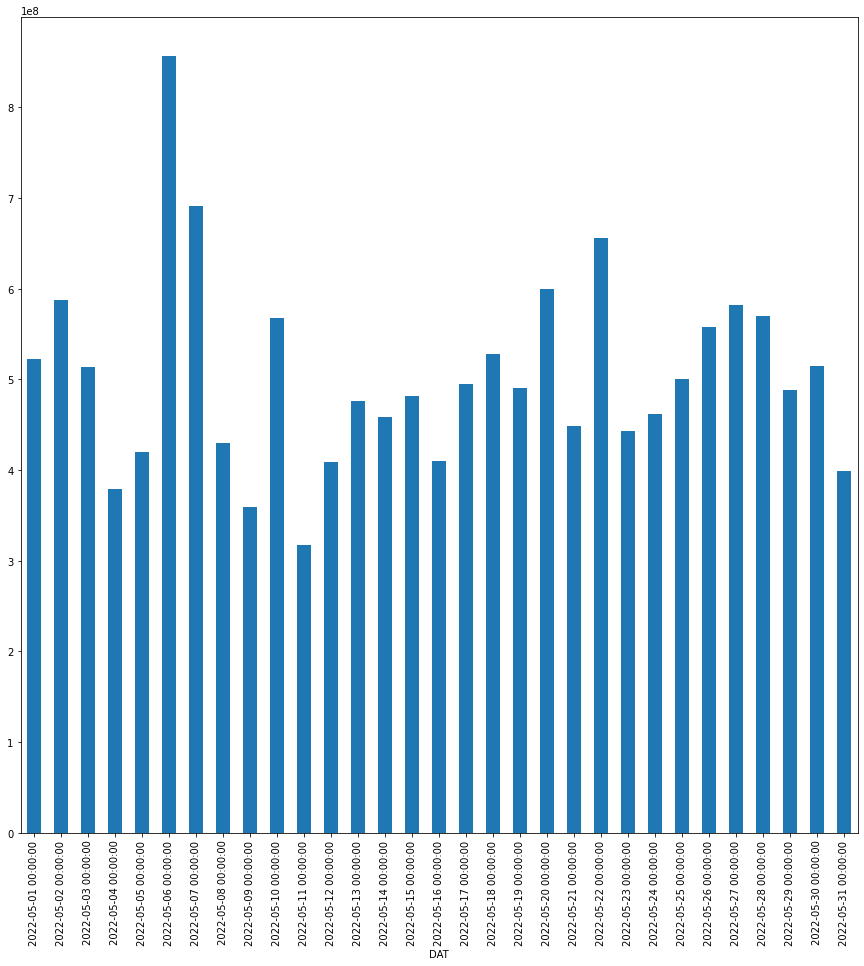

In [204]:
df_earnings_05.groupby(df_earnings_05.DAT)['TotalSumm'].sum().plot.bar(rot=90, figsize=(15, 15))

##### 6 мая наблюдаем пик
##### немного разведки на открытых даннных - 6 мая Аэрофлот возобновил полёты в Турцию - https://tourism.interfax.ru/ru/news/articles/87415/


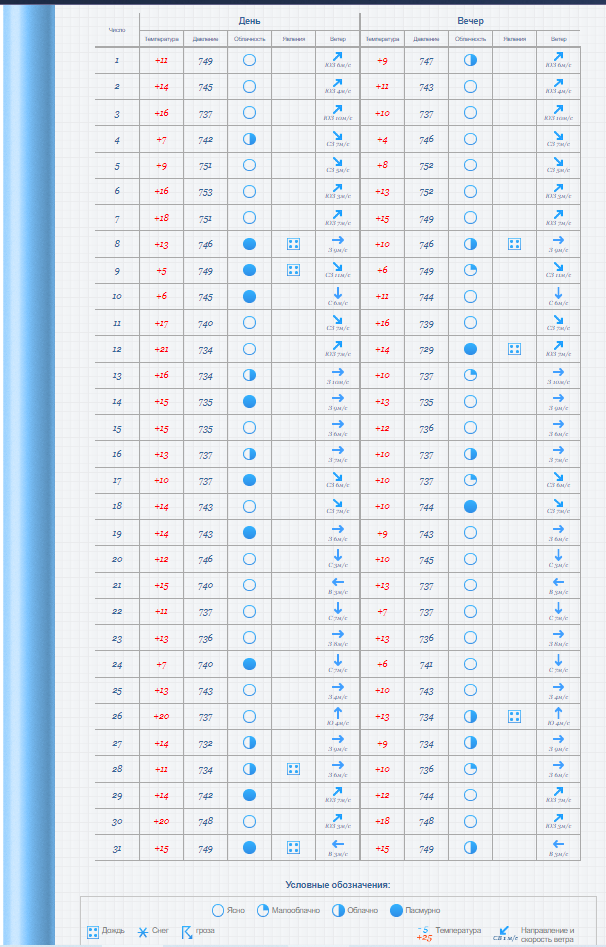

In [23]:

Image("data/extra_data/weather.png")

#### посмотрели погоду и сделали вывод, что сильных катаклизмов за месяц не было, поэтому на этих данных будет сложно построить зависиомсть от погоды
#### но глобально можно использовать в качестве индикаторы плохой погоды или других задержек время самолёта, проведённое в аэропорту
#### полезными были бы также данные о расписании вылетов

<AxesSubplot:xlabel='orgtype'>

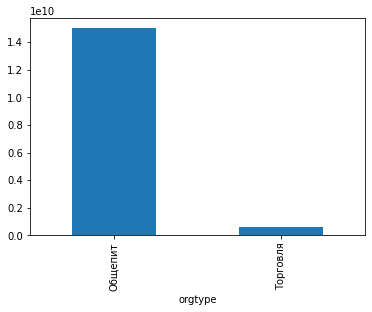

In [24]:
df_earnings_05.groupby(df_earnings_05.orgtype)['TotalSumm'].sum().plot.bar(rot=90)

<AxesSubplot:xlabel='Time'>

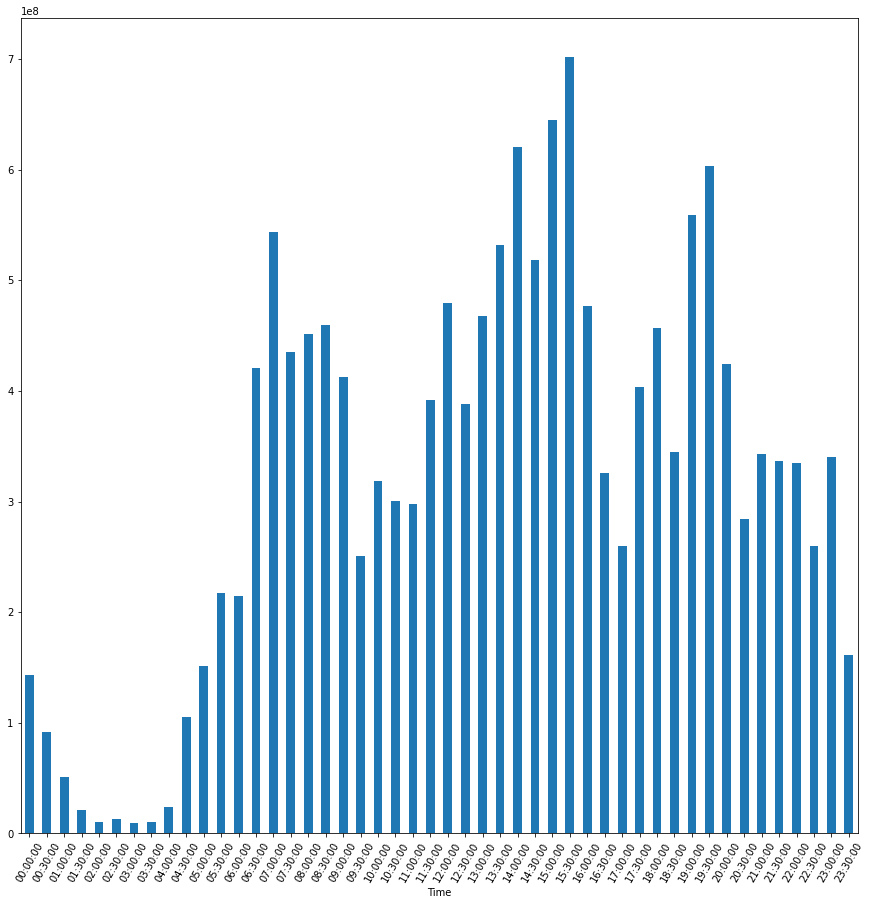

In [203]:
df_earnings_05.groupby(df_earnings_05.Time)['TotalSumm'].sum().plot.bar(rot=60, figsize=(15, 15))

##### Можно заметить, что в ночные часы выручка точек минимальна, а максимальна в 15-15:30 часов дня

<AxesSubplot:ylabel='TotalSumm'>

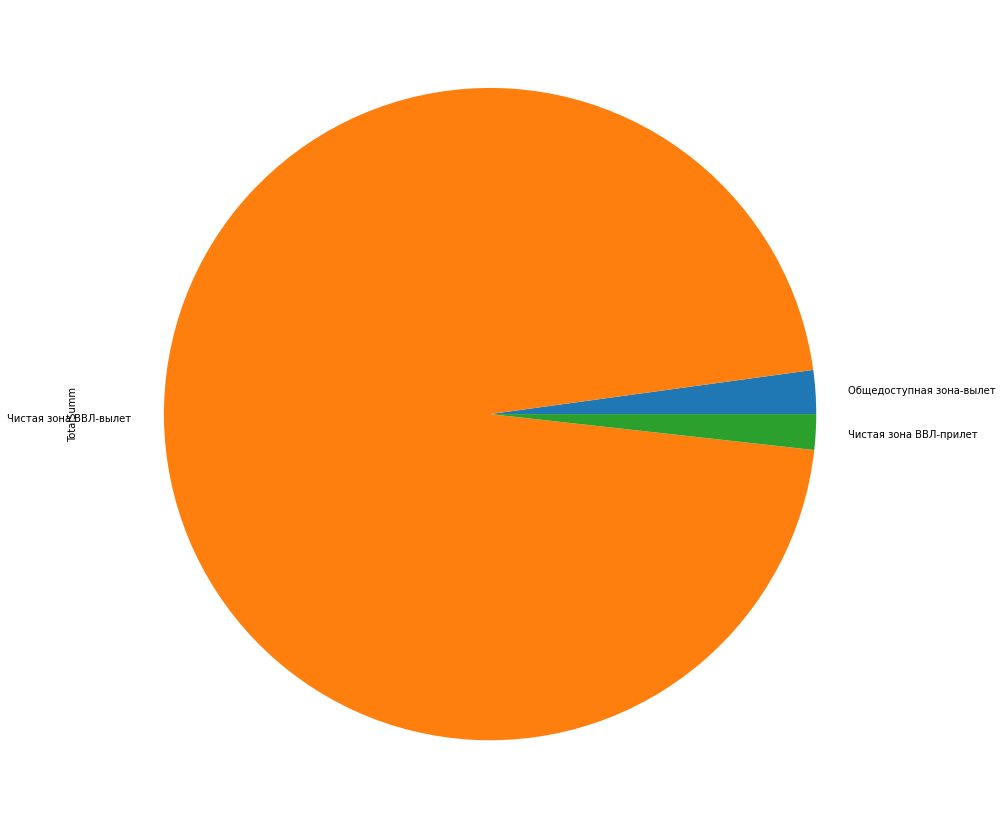

In [126]:
df_earnings_05.groupby(df_earnings_05.tzone)['TotalSumm'].sum().plot.pie(rot=60, figsize=(15, 15))

In [120]:
df_schedule = pd.read_excel("data/extra_data/schedule_05-06.2022.xlsx")

In [121]:
df_schedule

,Дата прилёта рейса,Тип Самолёта,АВИАКОМПАНИЯ,Регестрационный номер,Прилёт,Прилёт Рейс,время приземления,код аэропорта прилёт,Вылет,Вылет рейс,время вылета,Код аэропорта вылет
0,2022-05-01,32N,SU,73732,INB,SU 1463,2022-05-01 15:41:00,OVB,OUT,SU 1462,2022-05-02 06:21:00,OVB
1,2022-05-01,32A,SU,73179,INB,SU 1249,2022-05-01 22:16:00,REN,OUT,SU 1246,2022-05-02 06:28:00,REN
2,2022-05-01,SU9,SU,89026,INB,SU 1391,2022-05-01 13:27:00,SCW,OUT,SU 1434,2022-05-01 14:57:00,MQF
3,2022-05-01,32B,SU,73161,INB,SU 1311,2022-05-01 21:32:00,MRV,OUT,SU 1886,2022-05-02 07:31:00,FRU
4,2022-05-01,SU9,FV,89130,INB,FV 6258,2022-05-01 12:27:00,CEK,OUT,FV 6275,2022-05-02 00:04:00,CEK
...,...,...,...,...,...,...,...,...,...,...,...,...
16115,2022-07-01,32A,SU,73773,INB,SU 033,2022-07-01 07:02:00,LED,OUT,SU 1366,2022-07-01 08:48:00,STW
16116,2022-07-01,32Q,SU,73703,INB,SU 025,2022-07-01 20:54:00,LED,OUT,SU 1646,2022-07-01 22:40:00,NJC
16117,2022-07-01,32B,SU,73725,INB,SU 1261,2022-07-01 06:55:00,UFA,OUT,SU 1460,2022-07-01 08:57:00,OVB
16118,2022-07-01,73H,SU,73115,INB,SU 1669,2022-07-01 14:45:00,AER,OUT,SU 1716,2022-07-01 15:51:00,SVX


In [130]:
#для юпитера, в коллабе у меня не работает
df_airports = pd.DataFrame(df_schedule.groupby(['Дата прилёта рейса', 'Код аэропорта вылет'])['Дата прилёта рейса', 'Код аэропорта вылет'].value_counts().unstack())
df_airports.reset_index(inplace=True)

<ipython-input-130-5bb3c852efd7>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_airports = pd.DataFrame(df_schedule.groupby(['Дата прилёта рейса', 'Код аэропорта вылет'])['Дата прилёта рейса', 'Код аэропорта вылет'].value_counts().unstack())


In [131]:
df_plane_types = pd.DataFrame(df_schedule.groupby(['Дата прилёта рейса', 'Тип Самолёта'])['Дата прилёта рейса', 'Тип Самолёта'].value_counts().unstack())
df_plane_types.reset_index(inplace=True)

<ipython-input-131-d67d0c5d7d17>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_plane_types = pd.DataFrame(df_schedule.groupby(['Дата прилёта рейса', 'Тип Самолёта'])['Дата прилёта рейса', 'Тип Самолёта'].value_counts().unstack())


In [132]:
df_companies = pd.DataFrame(df_schedule.groupby(['Дата прилёта рейса', 'АВИАКОМПАНИЯ'])['Дата прилёта рейса', 'АВИАКОМПАНИЯ'].value_counts().unstack())
df_companies.reset_index(inplace=True)

<ipython-input-132-7e2846da3789>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_companies = pd.DataFrame(df_schedule.groupby(['Дата прилёта рейса', 'АВИАКОМПАНИЯ'])['Дата прилёта рейса', 'АВИАКОМПАНИЯ'].value_counts().unstack())


In [133]:

df_companies.columns

Index(['Дата прилёта рейса', '4B', '5N', '6Q', 'AF', 'AH', 'B2', 'BAF', 'BYS',
       'CA', 'CVS', 'D2', 'EO', 'EY', 'F7', 'FG', 'FV', 'HU', 'HY', 'IR', 'J2',
       'JD', 'JSI', 'JU', 'LUK', 'MU', 'N4', 'NKP', 'NWC', 'OAO', 'OVD', 'QFZ',
       'QR', 'RDA', 'RF', 'RL', 'RSD', 'RSJ', 'RT', 'S7', 'SU', 'TIS', 'TUL',
       'U6', 'VI', 'W5', 'WZ', 'XC', 'XX', 'YC', 'ZR'],
      dtype='object', name='АВИАКОМПАНИЯ')

In [134]:
#df_companies = df_companies.reset_index(level=0)
df_companies = df_companies.rename(columns={'Дата прилёта рейса': 'DAT'})
df_companies['DAT'] = pd.to_datetime(df_companies['DAT'])
#df_companies['DAT'] = df_companies['Дата прилёта рейса']
df_companies = df_companies.fillna(0)
df_companies

АВИАКОМПАНИЯ,DAT,4B,5N,6Q,AF,AH,B2,BAF,BYS,CA,...,TIS,TUL,U6,VI,W5,WZ,XC,XX,YC,ZR
0,2022-05-01,3.0,5.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2022-05-02,0.0,6.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,2022-05-03,2.0,6.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,2022-05-04,3.0,7.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0
4,2022-05-05,1.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2022-06-27,1.0,13.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,1.0,2.0
58,2022-06-28,3.0,12.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,2.0,1.0,4.0,0.0,0.0
59,2022-06-29,1.0,14.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,...,0.0,1.0,0.0,2.0,1.0,3.0,1.0,3.0,1.0,0.0
60,2022-06-30,0.0,13.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,...,0.0,1.0,0.0,2.0,0.0,3.0,0.0,1.0,0.0,0.0


In [135]:
df_plane_types = df_plane_types.rename(columns={'Дата прилёта рейса': 'DAT'})
df_plane_types['DAT'] = pd.to_datetime(df_plane_types['DAT'])
#df_companies['DAT'] = df_companies['Дата прилёта рейса']
df_plane_types = df_plane_types.fillna(0)

In [136]:
df_airports = df_airports.rename(columns={'Дата прилёта рейса': 'DAT'})
df_airports['DAT'] = pd.to_datetime(df_airports['DAT'])
#df_companies['DAT'] = df_companies['Дата прилёта рейса']
df_airports = df_airports.fillna(0)

##### Посмотрим, много ли уникальных авиакомпаний летает

In [137]:
df_schedule['АВИАКОМПАНИЯ'].unique()


array(['SU', 'FV', 'CA', 'D2', '5N', 'N4', 'BAF', 'JU', 'QR', 'EO', 'B2',
       'EY', 'XC', '4B', 'YC', 'F7', 'TIS', 'HY', 'XX', 'W5', 'VI', 'MU',
       'QFZ', 'JSI', '6Q', 'U6', 'LUK', 'AH', 'CVS', 'IR', 'S7', 'RT',
       'RSD', 'TUL', 'FG', 'OAO', 'WZ', 'RF', 'NWC', 'BYS', 'AF', 'RSJ',
       'ZR', 'OVD', 'JD', 'HU', 'J2', 'RL', 'RDA', 'NKP'], dtype=object)

<AxesSubplot:xlabel='Дата прилёта рейса'>

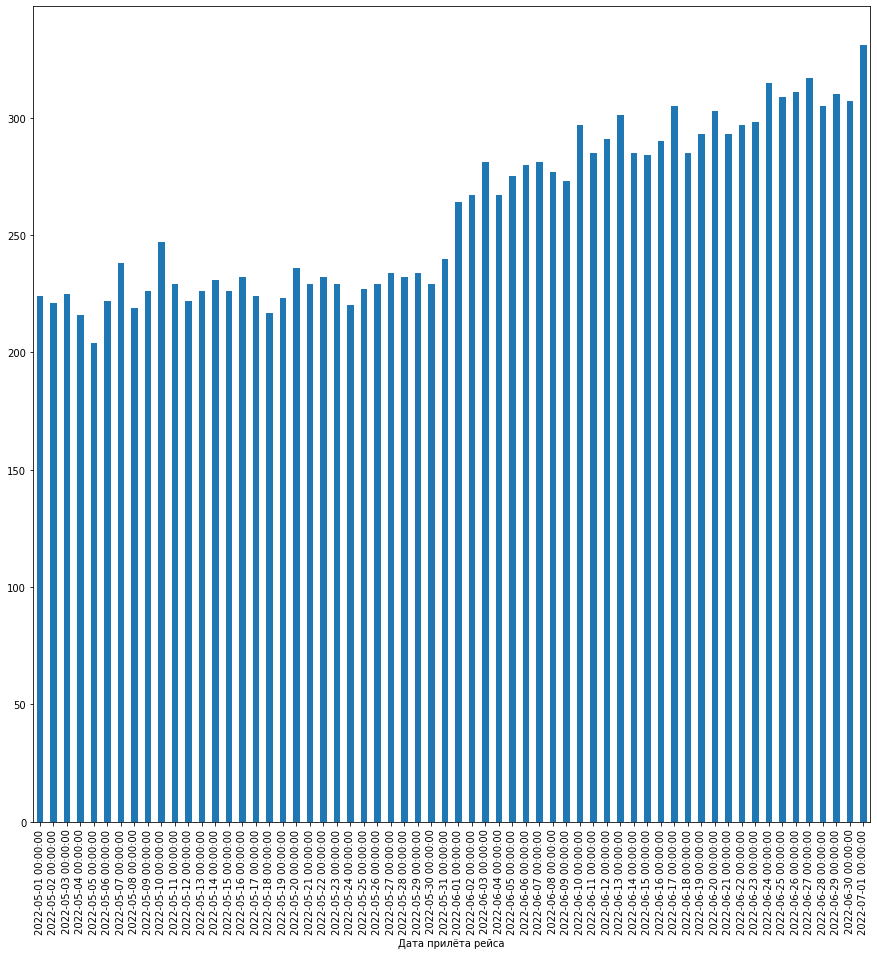

In [138]:
df_schedule['Дата прилёта рейса'].groupby(df_schedule['Дата прилёта рейса']).count().plot.bar(rot=90, figsize=(15, 15))

#### посмотрим самые популярные направления, может быть от направления зависит, сколько пассажиров готов отдать денег в аэропрте

In [139]:
df_schedule['АВИАКОМПАНИЯ'].groupby(df_schedule['АВИАКОМПАНИЯ']).count().sort_values().tail(20)

АВИАКОМПАНИЯ
TUL       20
F7        25
XC        35
RF        36
YC        36
QR        49
VI        54
CA        60
EY        62
JU        74
WZ        90
4B        90
XX       104
B2       124
EO       195
D2       255
5N       543
N4       703
FV      2716
SU     10674
Name: АВИАКОМПАНИЯ, dtype: int64

In [140]:
df_schedule['Код аэропорта вылет'].groupby(df_schedule['Код аэропорта вылет']).count().sort_values().tail(20)

Код аэропорта вылет
TJM     287
PEE     297
UFA     306
KJA     310
ARH     311
CEK     345
MSQ     347
OVB     352
AYT     354
GOJ     365
VOG     367
MMK     401
MCX     419
KUF     468
KZN     487
MRV     498
KGD     617
SVX     643
AER    1254
LED    1443
Name: Код аэропорта вылет, dtype: int64

#### к лету пассажиропоток увеличивался

## Добавление новых фичей

In [165]:
df_passengers_05 = pd.read_excel("data/05.2022_passengers.xlsx")

In [166]:
df_passengers_06 = pd.read_excel("data/06.2022_passengers.xlsx")

In [167]:
df_passengers_05['Вход в чистую зону'] = pd.to_datetime(df_passengers_05['Вход в чистую зону'])
df_passengers_05['Выход на рейс'] = pd.to_datetime(df_passengers_05['Выход на рейс'])
df_passengers_05

,Дата рейса,Рейс,Вход в чистую зону,Выход на рейс,Терминал,Авиакомпания,Направление куда летит
0,2022-05-01,5N 237,2022-04-30 21:46:20,2022-05-01 00:21:00,B,5N,OVB
1,2022-05-01,5N 237,2022-04-30 21:46:47,2022-05-01 00:21:00,B,5N,OVB
2,2022-05-01,5N 237,2022-04-30 21:47:47,2022-05-01 00:21:00,B,5N,OVB
3,2022-05-01,5N 237,2022-04-30 21:48:20,2022-05-01 00:21:00,B,5N,OVB
4,2022-05-01,5N 237,2022-04-30 21:49:12,2022-05-01 00:21:00,B,5N,OVB
...,...,...,...,...,...,...,...
53477,2022-05-31,XC 8304,2022-05-30 23:56:57,2022-05-31 03:08:00,C,XC,AYT
53478,2022-05-31,XC 8304,2022-05-30 23:57:07,2022-05-31 03:08:00,C,XC,AYT
53479,2022-05-31,XC 8304,2022-05-30 23:57:57,2022-05-31 03:08:00,C,XC,AYT
53480,2022-05-31,XC 8304,2022-05-30 23:58:24,2022-05-31 03:08:00,C,XC,AYT


In [168]:
df_passengers_06['Вход в чистую зону'] = pd.to_datetime(df_passengers_06['Вход в чистую зону'])
df_passengers_06['Выход на рейс'] = pd.to_datetime(df_passengers_06['Выход на рейс'])
df_passengers_06

,Дата рейса,Рейс,Вход в чистую зону,Выход на рейс,Терминал,Авиакомпания,Направление куда летит
0,2022-06-01,5N 237,2022-05-31 21:36:12,2022-06-01 00:24:00,B,5N,OVB
1,2022-06-01,5N 237,2022-05-31 21:36:24,2022-06-01 00:24:00,B,5N,OVB
2,2022-06-01,5N 237,2022-05-31 21:37:35,2022-06-01 00:24:00,B,5N,OVB
3,2022-06-01,5N 237,2022-05-31 21:38:31,2022-06-01 00:24:00,B,5N,OVB
4,2022-06-01,5N 237,2022-05-31 21:39:05,2022-06-01 00:24:00,B,5N,OVB
...,...,...,...,...,...,...,...
91664,2022-06-30,WZ 5081,2022-06-29 23:18:23,2022-06-30 00:06:00,C,WZ,AYT
91665,2022-06-30,WZ 5081,2022-06-29 23:30:43,2022-06-30 00:06:00,C,WZ,AYT
91666,2022-06-30,WZ 5081,2022-06-29 23:30:52,2022-06-30 00:06:00,C,WZ,AYT
91667,2022-06-30,WZ 5081,2022-06-29 23:51:42,2022-06-30 00:06:00,C,WZ,AYT


In [143]:
#данная функция подсчитывает количество пассажиров, потенциально находящихся в торговых зонах в определённый период времени

def count_passengers(point_time, terminal, zone, pas):
    pas_counter = 0
    if zone == 'Общедоступная зона-вылет':
      for index, row in pas.iterrows():
        if row['Вход в чистую зону'] - timedelta(hours=2) <= point_time and row['Вход в чистую зону'] >= point_time and terminal == row['Терминал']:
            pas_counter += 1
    else:
      for index, row in pas.iterrows():
          if row['Вход в чистую зону'] <= point_time and row['Выход на рейс'] >= point_time and terminal == row['Терминал']:
            pas_counter += 1
            
    print("lol", pas_counter)
    return pas_counter


In [108]:
df_earnings_05['PasNumber'] = 0
df_earnings_05

,TimeThirty,DAT,Торговая точка,Касса,orgtype,terminal,tzone,TotalSumm,Time,PasNumber
0,2022-05-01 00:00:00,2022-05-01,Торговая точка 0601,7683,Общепит,B,Чистая зона ВВЛ-вылет,755 448,00:00:00,0
1,2022-05-04 13:30:00,2022-05-04,Торговая точка 2373,3114,Общепит,B,Общедоступная зона-вылет,46 800,13:30:00,0
2,2022-05-05 18:00:00,2022-05-05,Торговая точка 8998,9887,Торговля,B,Чистая зона ВВЛ-вылет,160 160,18:00:00,0
3,2022-05-25 22:00:00,2022-05-25,Торговая точка 8313,2251,Общепит,B,Чистая зона ВВЛ-вылет,248 960,22:00:00,0
4,2022-05-10 00:30:00,2022-05-10,Торговая точка 8998,9887,Торговля,B,Чистая зона ВВЛ-вылет,117 600,00:30:00,0
...,...,...,...,...,...,...,...,...,...,...
11835,2022-05-12 19:00:00,2022-05-12,Торговая точка 8313,2251,Общепит,B,Чистая зона ВВЛ-вылет,72 320,19:00:00,0
11836,2022-05-24 10:00:00,2022-05-24,Торговая точка 3726,5944,Общепит,B,Чистая зона ВВЛ-вылет,396 000,10:00:00,0
11837,2022-05-12 08:00:00,2022-05-12,Торговая точка 3726,5944,Общепит,B,Чистая зона ВВЛ-вылет,300 000,08:00:00,0
11838,2022-05-28 21:30:00,2022-05-28,Торговая точка 0601,7683,Общепит,B,Чистая зона ВВЛ-вылет,444 800,21:30:00,0


In [ ]:
df_earnings_06['PasNumber'] = 0
df_earnings_06

In [ ]:
#внимание, это будет очень долго считаться (лучше пропустите)
#добавим столбец с количеством пассжиров в каждый момент времени
df_earnings_05['PasNumber'] = df_earnings_05.apply(lambda x: count_passengers(x['TimeThirty'], x['terminal'], df_passengers), axis=1)
df_earnings_06['PasNumber'] = df_earnings_06.apply(lambda x: count_passengers(x['TimeThirty'], x['terminal'], df_passengers), axis=1)

In [208]:
%ls data

 ’®¬ ў гбва®©бвўҐ D Ё¬ҐҐв ¬ҐвЄг Data
 ‘ҐаЁ©­л© ­®¬Ґа в®¬ : CA6A-EB46

 ‘®¤Ґа¦Ё¬®Ґ Ї ЇЄЁ D:\University\• Є в®­л\–Ёда®ў®© Їа®алў - €­­®Ї®«Ёб (�ҐаҐ¬ҐвмҐў® - 2022)\data

20.11.2022  10:55    <DIR>          .
20.11.2022  10:55    <DIR>          ..
16.11.2022  11:31    <DIR>          .ipynb_checkpoints
11.11.2022  16:13         1я879я814 05.2022_passengers.xlsx
11.11.2022  16:13           723я531 05.2022_‚лагзЄ .xlsx
11.11.2022  16:13         3я198я257 06.2022_passengers.xlsx
11.11.2022  16:13           764я345 06.2022_‚лагзЄ .xlsx
17.11.2022  18:44           513я830 Airports.ipynb
17.11.2022  16:38    <DIR>          extra_data
20.11.2022  10:54           156я979 pass_numbers_per_hour_05.xlsx
20.11.2022  10:54           162я779 pass_numbers_per_hour_06.xlsx
15.11.2022  15:18               555 Untitled.ipynb
11.11.2022  16:13         1я210я464 ђ бЇЁб ­ЁҐ аҐ©б®ў 05-06.2022.xlsx
11.11.2022  16:13            63я450 ‘Їа ў®з­ЁЄ_AIRLINES.xlsx
11.11.2022  16:13            82я211 ‘Їа ў®з­ЁЄ_AIRPORTS.

In [210]:
#следующие две ячейки локально для моего комптбютера, можно пропустить
pn5 = pd.read_excel("data/pass_numbers_per_hour_05.xlsx")
pn6 = pd.read_excel("data/pass_numbers_per_hour_06.xlsx")

In [280]:
df_earnings_05['PasNumber'] = pn5['PasNumber']
df_earnings_06['PasNumber'] = pn6['PasNumber']

In [147]:
df_earnings_05.orgtype = df_earnings_05.orgtype.astype(str)
df_earnings_05.terminal = df_earnings_05.terminal.astype(str)
df_earnings_05.tzone = df_earnings_05.tzone.astype(str)

In [ ]:
df_earnings_05.orgtype = df_earnings_05.orgtype.astype(str)
df_earnings_05.terminal = df_earnings_05.terminal.astype(str)
df_earnings_05.tzone = df_earnings_05.tzone.astype(str)

In [281]:
df_earnings_05

,TimeThirty,DAT,Торговая точка,Касса,orgtype,terminal,tzone,TotalSumm,Time,Т_Торговая точка 0601,...,Т_Торговая точка 5648,Т_Торговая точка 3726,Т_Торговая точка 8219,o_Общепит,o_Торговля,t_B,t_Чистая зона ВВЛ-вылет,t_Общедоступная зона-вылет,t_Чистая зона ВВЛ-прилет,PasNumber
0,2022-05-01 00:00:00,2022-05-01,Торговая точка 0601,7683,Общепит,B,Чистая зона ВВЛ-вылет,755448.0,00:00:00,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1707
1,2022-05-04 13:30:00,2022-05-04,Торговая точка 2373,3114,Общепит,B,Общедоступная зона-вылет,46800.0,13:30:00,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0
2,2022-05-05 18:00:00,2022-05-05,Торговая точка 8998,9887,Торговля,B,Чистая зона ВВЛ-вылет,160160.0,18:00:00,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,9
3,2022-05-25 22:00:00,2022-05-25,Торговая точка 8313,2251,Общепит,B,Чистая зона ВВЛ-вылет,248960.0,22:00:00,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,260
4,2022-05-10 00:30:00,2022-05-10,Торговая точка 8998,9887,Торговля,B,Чистая зона ВВЛ-вылет,117600.0,00:30:00,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11835,2022-05-12 19:00:00,2022-05-12,Торговая точка 8313,2251,Общепит,B,Чистая зона ВВЛ-вылет,72320.0,19:00:00,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,17
11836,2022-05-24 10:00:00,2022-05-24,Торговая точка 3726,5944,Общепит,B,Чистая зона ВВЛ-вылет,396000.0,10:00:00,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
11837,2022-05-12 08:00:00,2022-05-12,Торговая точка 3726,5944,Общепит,B,Чистая зона ВВЛ-вылет,300000.0,08:00:00,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5
11838,2022-05-28 21:30:00,2022-05-28,Торговая точка 0601,7683,Общепит,B,Чистая зона ВВЛ-вылет,444800.0,21:30:00,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,192


In [282]:
df_earnings_06

,TimeThirty,DAT,Торговая точка,Касса,orgtype,terminal,tzone,TotalSumm,Time,Т_Торговая точка 5648,...,Т_Торговая точка 8998,Т_Торговая точка 3726,Т_Торговая точка 0601,o_Общепит,o_Торговля,t_B,t_Чистая зона ВВЛ-прилет,t_Чистая зона ВВЛ-вылет,t_Общедоступная зона-вылет,PasNumber
0,2022-06-05 00:00:00,2022-06-05,Торговая точка 5648,3601,Общепит,B,Чистая зона ВВЛ-прилет,298560.0,00:00:00,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1451
1,2022-06-17 03:00:00,2022-06-17,Торговая точка 8313,538,Общепит,B,Чистая зона ВВЛ-вылет,103680.0,03:00:00,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,36
2,2022-06-29 15:00:00,2022-06-29,Торговая точка 2968,9033,Общепит,B,Чистая зона ВВЛ-вылет,5796800.0,15:00:00,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,202
3,2022-06-29 10:00:00,2022-06-29,Торговая точка 2373,3114,Общепит,B,Общедоступная зона-вылет,114800.0,10:00:00,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0
4,2022-06-29 14:30:00,2022-06-29,Торговая точка 5648,3601,Общепит,B,Чистая зона ВВЛ-прилет,98720.0,14:30:00,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12204,2022-06-16 22:30:00,2022-06-16,Торговая точка 8998,7998,Торговля,B,Чистая зона ВВЛ-вылет,25440.0,22:30:00,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,909
12205,2022-06-02 06:00:00,2022-06-02,Торговая точка 2968,9033,Общепит,B,Чистая зона ВВЛ-вылет,1498400.0,06:00:00,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,22
12206,2022-06-02 17:00:00,2022-06-02,Торговая точка 0601,7683,Общепит,B,Чистая зона ВВЛ-вылет,8685048.0,17:00:00,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5
12207,2022-06-22 13:00:00,2022-06-22,Торговая точка 2373,3114,Общепит,B,Общедоступная зона-вылет,163600.0,13:00:00,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0


In [213]:
df_oh = pd.get_dummies(
    data=df_earnings_05,
    columns=["Торговая точка", "orgtype", "terminal", "tzone"],
    prefix=["trade_point", "orgtype", "terminal", "tzone"])

In [214]:


cat_cols = ["Торговая точка", "orgtype", "terminal", "tzone"]
cat_cols_encoded = []
for col in cat_cols:
  cat_cols_encoded += [f"{col[0]}_{cat}" for cat in list(df_earnings_05[col].unique())]

cat_cols_encoded

['Т_Торговая точка 0601',
 'Т_Торговая точка 2373',
 'Т_Торговая точка 8998',
 'Т_Торговая точка 8313',
 'Т_Торговая точка 2968',
 'Т_Торговая точка 5648',
 'Т_Торговая точка 3726',
 'Т_Торговая точка 8219',
 'o_Общепит',
 'o_Торговля',
 't_B',
 't_Чистая зона ВВЛ-вылет',
 't_Общедоступная зона-вылет',
 't_Чистая зона ВВЛ-прилет']

In [261]:
df_oh6 = pd.get_dummies(
    data=df_earnings_05,
    columns=["Торговая точка", "orgtype", "terminal", "tzone"],
    prefix=["trade_point", "orgtype", "terminal", "tzone"])

In [262]:

cat_cols = ["Торговая точка", "orgtype", "terminal", "tzone"]
cat_cols_encoded = []
for col in cat_cols:
  cat_cols_encoded += [f"{col[0]}_{cat}" for cat in list(df_earnings_06[col].unique())]

cat_cols_encoded

['Т_Торговая точка 5648',
 'Т_Торговая точка 8313',
 'Т_Торговая точка 2968',
 'Т_Торговая точка 2373',
 'Т_Торговая точка 8998',
 'Т_Торговая точка 3726',
 'Т_Торговая точка 0601',
 'o_Общепит',
 'o_Торговля',
 't_B',
 't_Чистая зона ВВЛ-прилет',
 't_Чистая зона ВВЛ-вылет',
 't_Общедоступная зона-вылет']

In [215]:
oh_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_cols = oh_encoder.fit_transform(df_earnings_05[cat_cols])
df_enc = pd.DataFrame(encoded_cols, columns=cat_cols_encoded)
df_earnings_05 = df_earnings_05.join(df_enc)
df_earnings_05

ValueError: columns overlap but no suffix specified: Index(['Т_Торговая точка 0601', 'Т_Торговая точка 2373',
       'Т_Торговая точка 8998', 'Т_Торговая точка 8313',
       'Т_Торговая точка 2968', 'Т_Торговая точка 5648',
       'Т_Торговая точка 3726', 'Т_Торговая точка 8219', 'o_Общепит',
       'o_Торговля', 't_B', 't_Чистая зона ВВЛ-вылет',
       't_Общедоступная зона-вылет', 't_Чистая зона ВВЛ-прилет'],
      dtype='object')

In [264]:
oh_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_cols = oh_encoder.fit_transform(df_earnings_06[cat_cols])
df_enc = pd.DataFrame(encoded_cols6, columns=cat_cols_encoded)
df_earnings_06 = df_earnings_06.join(df_enc)
df_earnings_06

,TimeThirty,DAT,Торговая точка,Касса,orgtype,terminal,tzone,TotalSumm,Time,Т_Торговая точка 5648,...,Т_Торговая точка 2373,Т_Торговая точка 8998,Т_Торговая точка 3726,Т_Торговая точка 0601,o_Общепит,o_Торговля,t_B,t_Чистая зона ВВЛ-прилет,t_Чистая зона ВВЛ-вылет,t_Общедоступная зона-вылет
0,2022-06-05 00:00:00,2022-06-05,Торговая точка 5648,3601,Общепит,B,Чистая зона ВВЛ-прилет,298560.0,00:00:00,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2022-06-17 03:00:00,2022-06-17,Торговая точка 8313,538,Общепит,B,Чистая зона ВВЛ-вылет,103680.0,03:00:00,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,2022-06-29 15:00:00,2022-06-29,Торговая точка 2968,9033,Общепит,B,Чистая зона ВВЛ-вылет,5796800.0,15:00:00,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,2022-06-29 10:00:00,2022-06-29,Торговая точка 2373,3114,Общепит,B,Общедоступная зона-вылет,114800.0,10:00:00,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,2022-06-29 14:30:00,2022-06-29,Торговая точка 5648,3601,Общепит,B,Чистая зона ВВЛ-прилет,98720.0,14:30:00,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12204,2022-06-16 22:30:00,2022-06-16,Торговая точка 8998,7998,Торговля,B,Чистая зона ВВЛ-вылет,25440.0,22:30:00,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
12205,2022-06-02 06:00:00,2022-06-02,Торговая точка 2968,9033,Общепит,B,Чистая зона ВВЛ-вылет,1498400.0,06:00:00,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
12206,2022-06-02 17:00:00,2022-06-02,Торговая точка 0601,7683,Общепит,B,Чистая зона ВВЛ-вылет,8685048.0,17:00:00,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
12207,2022-06-22 13:00:00,2022-06-22,Торговая точка 2373,3114,Общепит,B,Общедоступная зона-вылет,163600.0,13:00:00,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [293]:
df_earnings_05.columns

Index(['TimeThirty', 'DAT', 'Торговая точка', 'Касса', 'orgtype', 'terminal',
       'tzone', 'TotalSumm', 'Time', 'Т_Торговая точка 0601',
       'Т_Торговая точка 2373', 'Т_Торговая точка 8998',
       'Т_Торговая точка 8313', 'Т_Торговая точка 2968',
       'Т_Торговая точка 5648', 'Т_Торговая точка 3726',
       'Т_Торговая точка 8219', 'o_Общепит', 'o_Торговля', 't_B',
       't_Чистая зона ВВЛ-вылет', 't_Общедоступная зона-вылет',
       't_Чистая зона ВВЛ-прилет', 'PasNumber'],
      dtype='object')

In [294]:
df_earnings_06 = df_earnings_06.reindex(columns=['TimeThirty', 'DAT', 'Торговая точка', 'Касса', 'orgtype', 'terminal',
       'tzone', 'TotalSumm', 'Time', 'Т_Торговая точка 0601',
       'Т_Торговая точка 2373', 'Т_Торговая точка 8998',
       'Т_Торговая точка 8313', 'Т_Торговая точка 2968',
       'Т_Торговая точка 5648', 'Т_Торговая точка 3726',
       'Т_Торговая точка 8219', 'o_Общепит', 'o_Торговля', 't_B',
       't_Чистая зона ВВЛ-вылет', 't_Общедоступная зона-вылет',
       't_Чистая зона ВВЛ-прилет', 'PasNumber']).fillna(0)

In [295]:
df_earnings_06

,TimeThirty,DAT,Торговая точка,Касса,orgtype,terminal,tzone,TotalSumm,Time,Т_Торговая точка 0601,...,Т_Торговая точка 5648,Т_Торговая точка 3726,Т_Торговая точка 8219,o_Общепит,o_Торговля,t_B,t_Чистая зона ВВЛ-вылет,t_Общедоступная зона-вылет,t_Чистая зона ВВЛ-прилет,PasNumber
0,2022-06-05 00:00:00,2022-06-05,Торговая точка 5648,3601,Общепит,B,Чистая зона ВВЛ-прилет,298560.0,00:00:00,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1451
1,2022-06-17 03:00:00,2022-06-17,Торговая точка 8313,538,Общепит,B,Чистая зона ВВЛ-вылет,103680.0,03:00:00,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,36
2,2022-06-29 15:00:00,2022-06-29,Торговая точка 2968,9033,Общепит,B,Чистая зона ВВЛ-вылет,5796800.0,15:00:00,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,202
3,2022-06-29 10:00:00,2022-06-29,Торговая точка 2373,3114,Общепит,B,Общедоступная зона-вылет,114800.0,10:00:00,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0
4,2022-06-29 14:30:00,2022-06-29,Торговая точка 5648,3601,Общепит,B,Чистая зона ВВЛ-прилет,98720.0,14:30:00,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12204,2022-06-16 22:30:00,2022-06-16,Торговая точка 8998,7998,Торговля,B,Чистая зона ВВЛ-вылет,25440.0,22:30:00,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,909
12205,2022-06-02 06:00:00,2022-06-02,Торговая точка 2968,9033,Общепит,B,Чистая зона ВВЛ-вылет,1498400.0,06:00:00,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,22
12206,2022-06-02 17:00:00,2022-06-02,Торговая точка 0601,7683,Общепит,B,Чистая зона ВВЛ-вылет,8685048.0,17:00:00,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,5
12207,2022-06-22 13:00:00,2022-06-22,Торговая точка 2373,3114,Общепит,B,Общедоступная зона-вылет,163600.0,13:00:00,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0


In [296]:
result = pd.merge(df_earnings_05, df_companies, how="inner", on=["DAT"])
result = pd.merge(result, df_plane_types, how="inner", on=["DAT"])
result = pd.merge(result, df_airports, how="inner", on=["DAT"])


In [297]:
result

,TimeThirty,DAT,Торговая точка,Касса,orgtype,terminal,tzone,TotalSumm,Time,Т_Торговая точка 0601,...,VOG,VTB,VVO,WUH,XIY,XWKD,XXX,YKS,ZIA,ZZZA
0,2022-05-01 00:00:00,2022-05-01,Торговая точка 0601,7683,Общепит,B,Чистая зона ВВЛ-вылет,755448.0,00:00:00,1.0,...,4.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2022-05-01 14:00:00,2022-05-01,Торговая точка 3726,5944,Общепит,B,Чистая зона ВВЛ-вылет,2539200.0,14:00:00,0.0,...,4.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2022-05-01 19:00:00,2022-05-01,Торговая точка 5648,3601,Общепит,B,Чистая зона ВВЛ-прилет,406240.0,19:00:00,0.0,...,4.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2022-05-01 03:30:00,2022-05-01,Торговая точка 3726,5944,Общепит,B,Чистая зона ВВЛ-вылет,104000.0,03:30:00,0.0,...,4.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2022-05-01 22:30:00,2022-05-01,Торговая точка 2968,9033,Общепит,B,Чистая зона ВВЛ-вылет,1328000.0,22:30:00,0.0,...,4.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11835,2022-05-11 15:30:00,2022-05-11,Торговая точка 2373,3114,Общепит,B,Общедоступная зона-вылет,448400.0,15:30:00,0.0,...,3.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11836,2022-05-11 12:30:00,2022-05-11,Торговая точка 2373,3114,Общепит,B,Общедоступная зона-вылет,186800.0,12:30:00,0.0,...,3.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11837,2022-05-11 08:30:00,2022-05-11,Торговая точка 2968,9033,Общепит,B,Чистая зона ВВЛ-вылет,1368000.0,08:30:00,0.0,...,3.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11838,2022-05-11 05:00:00,2022-05-11,Торговая точка 8313,538,Общепит,B,Чистая зона ВВЛ-вылет,360480.0,05:00:00,0.0,...,3.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [298]:
result_06 = pd.merge(df_earnings_06, df_companies, how="inner", on=["DAT"])
result_06 = pd.merge(result_06, df_plane_types, how="inner", on=["DAT"])
result_06 = pd.merge(result_06, df_airports, how="inner", on=["DAT"])

In [299]:
result_06

,TimeThirty,DAT,Торговая точка,Касса,orgtype,terminal,tzone,TotalSumm,Time,Т_Торговая точка 0601,...,VOG,VTB,VVO,WUH,XIY,XWKD,XXX,YKS,ZIA,ZZZA
0,2022-06-05 00:00:00,2022-06-05,Торговая точка 5648,3601,Общепит,B,Чистая зона ВВЛ-прилет,298560.0,00:00:00,0.0,...,5.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2022-06-05 15:30:00,2022-06-05,Торговая точка 8313,279,Общепит,B,Чистая зона ВВЛ-вылет,19120.0,15:30:00,0.0,...,5.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2022-06-05 10:30:00,2022-06-05,Торговая точка 8313,279,Общепит,B,Чистая зона ВВЛ-вылет,107440.0,10:30:00,0.0,...,5.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2022-06-05 00:00:00,2022-06-05,Торговая точка 2968,9033,Общепит,B,Чистая зона ВВЛ-вылет,2013920.0,00:00:00,0.0,...,5.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2022-06-05 11:30:00,2022-06-05,Торговая точка 8313,2251,Общепит,B,Чистая зона ВВЛ-вылет,374160.0,11:30:00,0.0,...,5.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12204,2022-06-16 20:30:00,2022-06-16,Торговая точка 8313,538,Общепит,B,Чистая зона ВВЛ-вылет,789520.0,20:30:00,0.0,...,6.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
12205,2022-06-16 00:30:00,2022-06-16,Торговая точка 8313,2251,Общепит,B,Чистая зона ВВЛ-вылет,167280.0,00:30:00,0.0,...,6.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
12206,2022-06-16 17:30:00,2022-06-16,Торговая точка 5648,6213,Общепит,B,Общедоступная зона-вылет,2743760.0,17:30:00,0.0,...,6.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
12207,2022-06-16 22:30:00,2022-06-16,Торговая точка 8998,7998,Торговля,B,Чистая зона ВВЛ-вылет,25440.0,22:30:00,1.0,...,6.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0


British Airlines - одни из самых дорогих в мире, но это направление сейчас закрыто
Также есть гипотеза о том, что из открытых дорогих направлений самое дорогое - Дубай, но в датасете его нет
Потенциальная гипотеза в том, что люди, летящие дорогими направлениями, могут потратить много денег в аэропорте

<AxesSubplot:>

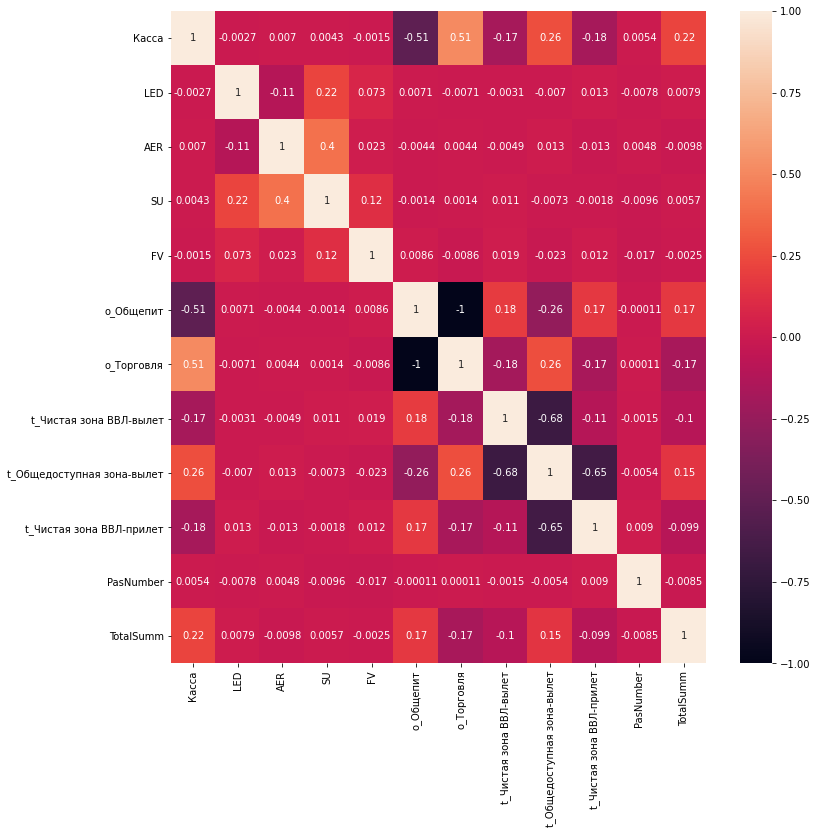

In [221]:


fig, ax = plt.subplots(figsize=(12,12))   
sns.heatmap(result[['Касса', 'LED', 'AER', 'SU', 'FV', 'terminal',
 'o_Общепит',
 'o_Торговля',
 't_Чистая зона ВВЛ-вылет',
 't_Общедоступная зона-вылет',
 't_Чистая зона ВВЛ-прилет', 'PasNumber', 'TotalSumm']].corr(), annot = True, fmt='.2g')


<AxesSubplot:>

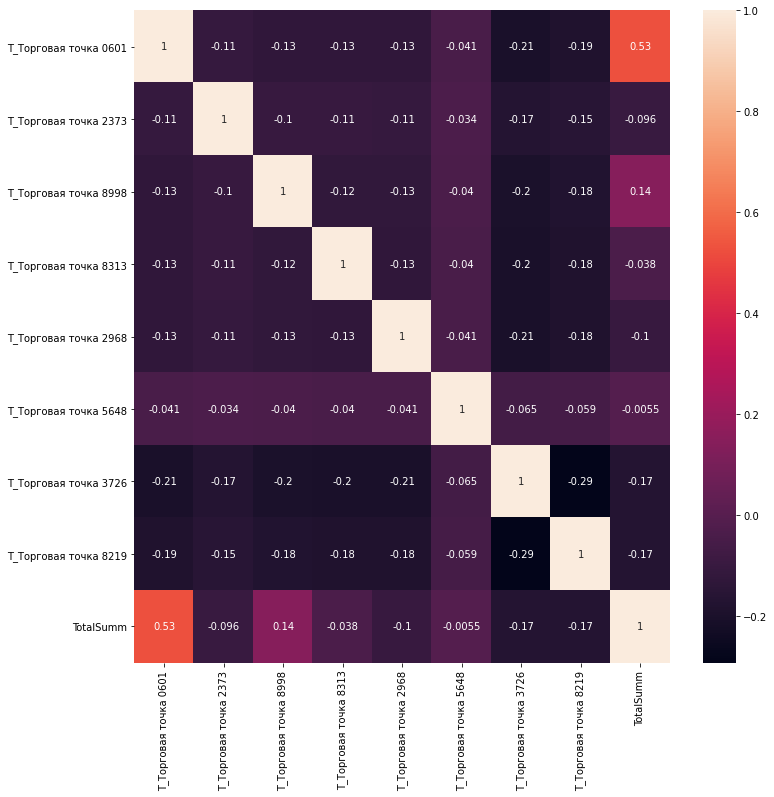

In [163]:
fig, ax = plt.subplots(figsize=(12,12))   
sns.heatmap(result[['Т_Торговая точка 0601',
 'Т_Торговая точка 2373',
 'Т_Торговая точка 8998',
 'Т_Торговая точка 8313',
 'Т_Торговая точка 2968',
 'Т_Торговая точка 5648',
 'Т_Торговая точка 3726',
 'Т_Торговая точка 8219',
 'TotalSumm']].corr(), annot = True, fmt='.2g')

Видим сильную зависиомсть выручки от расположения точки 0601, возможно стоит располагать точки в подобных местах

In [222]:

model = CatBoostRegressor()

In [175]:
result

,TimeThirty,DAT,Торговая точка,Касса,orgtype,terminal,tzone,TotalSumm,Time,Т_Торговая точка 0601,...,VOG,VTB,VVO,WUH,XIY,XWKD,XXX,YKS,ZIA,ZZZA
0,2022-05-01 00:00:00,2022-05-01,Торговая точка 0601,7683,Общепит,B,Чистая зона ВВЛ-вылет,755448.0,00:00:00,1.0,...,4.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2022-05-01 14:00:00,2022-05-01,Торговая точка 3726,5944,Общепит,B,Чистая зона ВВЛ-вылет,2539200.0,14:00:00,0.0,...,4.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2022-05-01 19:00:00,2022-05-01,Торговая точка 5648,3601,Общепит,B,Чистая зона ВВЛ-прилет,406240.0,19:00:00,0.0,...,4.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2022-05-01 03:30:00,2022-05-01,Торговая точка 3726,5944,Общепит,B,Чистая зона ВВЛ-вылет,104000.0,03:30:00,0.0,...,4.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2022-05-01 22:30:00,2022-05-01,Торговая точка 2968,9033,Общепит,B,Чистая зона ВВЛ-вылет,1328000.0,22:30:00,0.0,...,4.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11835,2022-05-11 15:30:00,2022-05-11,Торговая точка 2373,3114,Общепит,B,Общедоступная зона-вылет,448400.0,15:30:00,0.0,...,3.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11836,2022-05-11 12:30:00,2022-05-11,Торговая точка 2373,3114,Общепит,B,Общедоступная зона-вылет,186800.0,12:30:00,0.0,...,3.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11837,2022-05-11 08:30:00,2022-05-11,Торговая точка 2968,9033,Общепит,B,Чистая зона ВВЛ-вылет,1368000.0,08:30:00,0.0,...,3.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11838,2022-05-11 05:00:00,2022-05-11,Торговая точка 8313,538,Общепит,B,Чистая зона ВВЛ-вылет,360480.0,05:00:00,0.0,...,3.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [303]:
model = CatBoostRegressor(loss_function='MAE')

In [300]:
X_train = result.drop(columns=['Торговая точка', 'orgtype', 'terminal', 'tzone', 'Time', 'TotalSumm'])
y_train = result['TotalSumm']
X_test = result_06.drop(columns=['Торговая точка', 'orgtype', 'terminal', 'tzone', 'Time', 'TotalSumm'])
y_test = result_06['TotalSumm']

In [301]:
X_test

,TimeThirty,DAT,Касса,Т_Торговая точка 0601,Т_Торговая точка 2373,Т_Торговая точка 8998,Т_Торговая точка 8313,Т_Торговая точка 2968,Т_Торговая точка 5648,Т_Торговая точка 3726,...,VOG,VTB,VVO,WUH,XIY,XWKD,XXX,YKS,ZIA,ZZZA
0,2022-06-05 00:00:00,2022-06-05,3601,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,5.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2022-06-05 15:30:00,2022-06-05,279,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,5.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2022-06-05 10:30:00,2022-06-05,279,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,5.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2022-06-05 00:00:00,2022-06-05,9033,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,5.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2022-06-05 11:30:00,2022-06-05,2251,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,5.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12204,2022-06-16 20:30:00,2022-06-16,538,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,6.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
12205,2022-06-16 00:30:00,2022-06-16,2251,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,6.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
12206,2022-06-16 17:30:00,2022-06-16,6213,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,6.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
12207,2022-06-16 22:30:00,2022-06-16,7998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0


In [305]:
grid = {'iterations': [1000],
        'learning_rate': [0.03, 0.1],
        'depth': [6, 8],
        'l2_leaf_reg': [0.2, 0.5]}
model.grid_search(grid, train_dataset)


bestTest = 907758.8387
bestIteration = 843

0:	loss: 907758.8387001	best: 907758.8387001 (0)	total: 17.9s	remaining: 2m 5s

bestTest = 902976.5676
bestIteration = 711

1:	loss: 902976.5676083	best: 902976.5676083 (1)	total: 33.8s	remaining: 1m 41s

bestTest = 903480.8885
bestIteration = 997

2:	loss: 903480.8885182	best: 902976.5676083 (1)	total: 51.1s	remaining: 1m 25s

bestTest = 902095.7902
bestIteration = 830

3:	loss: 902095.7902482	best: 902095.7902482 (3)	total: 1m 7s	remaining: 1m 7s

bestTest = 903352.1259
bestIteration = 950

4:	loss: 903352.1258727	best: 902095.7902482 (3)	total: 1m 35s	remaining: 57.1s

bestTest = 894763.8434
bestIteration = 418

5:	loss: 894763.8433700	best: 894763.8433700 (5)	total: 2m 1s	remaining: 40.5s

bestTest = 905041.539
bestIteration = 813

6:	loss: 905041.5390241	best: 894763.8433700 (5)	total: 2m 26s	remaining: 20.9s

bestTest = 904651.945
bestIteration = 326

7:	loss: 904651.9450407	best: 894763.8433700 (5)	total: 2m 51s	remaining: 0us
Estimat

{'params': {'depth': 8,
  'iterations': 1000,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.2},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               

In [306]:
X_test

,TimeThirty,DAT,Касса,Т_Торговая точка 0601,Т_Торговая точка 2373,Т_Торговая точка 8998,Т_Торговая точка 8313,Т_Торговая точка 2968,Т_Торговая точка 5648,Т_Торговая точка 3726,...,VOG,VTB,VVO,WUH,XIY,XWKD,XXX,YKS,ZIA,ZZZA
0,2022-06-05 00:00:00,2022-06-05,3601,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,5.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2022-06-05 15:30:00,2022-06-05,279,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,5.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2022-06-05 10:30:00,2022-06-05,279,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,5.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2022-06-05 00:00:00,2022-06-05,9033,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,5.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2022-06-05 11:30:00,2022-06-05,2251,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,5.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12204,2022-06-16 20:30:00,2022-06-16,538,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,6.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
12205,2022-06-16 00:30:00,2022-06-16,2251,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,6.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
12206,2022-06-16 17:30:00,2022-06-16,6213,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,6.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
12207,2022-06-16 22:30:00,2022-06-16,7998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0


In [308]:
y_pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('MAE', mean_absolute_error(y_test, y_pred))


Testing performance
RMSE: 4177934.47
MAE 1936232.3149739434


In [309]:
df_my = pd.read_excel("data/06.2022_Выручка.xlsx")

In [329]:
df_my['Прибыль на момент времени'][:12209] = y_pred // 1000

<ipython-input-329-8b527e92502a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_my['Прибыль на момент времени'][:12209] = y_pred // 1000


In [331]:
df_my['Прибыль на момент времени'][12209:12209 * 2] = y_pred // 1000

<ipython-input-331-e6d517ab13b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_my['Прибыль на момент времени'][12209:12209 * 2] = y_pred // 1000


In [332]:
df_my['Дата'] = pd.to_datetime(df_my['Дата'])

In [334]:
df_my.to_excel("final_result.xlsx")

In [321]:
df_my['Дата с разбивкой по 30 минут'] = pd.to_datetime(df_my['Дата с разбивкой по 30 минут'])

In [325]:
df_my['Прибыль на момент времени'].apply(lambda x: float(x.split()[0].replace(',', '')))

AttributeError: 'int' object has no attribute 'split'

In [313]:
from random import uniform

что делаем:
    1. Считаем скок пассажир находился в зоне вылета (пассажиропоток)
    2. Стекаем пассажиров по времени и терминалом с табличкой выручка
    3. Стекаем вылетающие в определённое время самолёты  с табличкой выручка (их количество) мб плохая идея
    4. надо найти расписание вылетов самолётов (или юзать разницу между тем, когда самолёт прилетел в аэропрт-вылетел)
    5. Encoding cat-features